# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 3 de abril de 2022__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
RANDOM_STATE = 22

# Apartado 1: Clasificador de noticias

__Número de grupo: 15__

__Nombres de los estudiantes: Javier Sande Ríos y Mario Sanz Guerrero__

## 1) Carga del conjunto de datos

El fichero `BBC News.csv` contiene noticias clasificadas en 5 categorías diferentes. 

Carga los datos en un dataframe teniendo en cuenta que la columna `ArticleId` es un identificador de la noticia y por lo tanto no debes usarlo para clasificar. 

Estudia el tamaño del conjunto de datos y la proporción de noticias que pertenecen a cada una de las categorías. Indica si debemos tenerlo en cuenta de alguna forma al analizar los modelos que construyamos.

Muestra un mensaje cualquiera y explica si lo habrías clasificado en la clase correcta tras leerlo.

Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn. 

#### Solución:

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv('BBC News.csv')
df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [4]:
df['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

<AxesSubplot:>

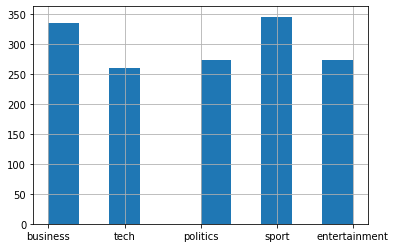

In [5]:
df['Category'].hist()

Como podemos ver al hacer la funcion `value_counts()` y al ver el histograma, la cantidad de noticias pertenecientes a cada categoría varía bastante, pero no lo suficiente como para suponer un problema a la hora de clasificar las noticias según su categoría porque tenemos una cantidad suficiente de cada una.

# PREGUNTA: A QUE SE REFIERE CON LO DEL MENSAJE CUALQUIERA (TERCER PARRAFO)

A continuación vamos a crear las particiones de los datos, a las que le daremos un 80% de los datos para entrenamiento y el 20% restante para test.

In [6]:
from sklearn.model_selection import train_test_split

news = df['Text'].to_numpy()
categories = df['Category'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(news,
                                                    categories,
                                                    test_size = 0.2,
                                                    random_state = RANDOM_STATE,
                                                    shuffle = True,
                                                    stratify = categories)

## 2) Representación basada en bolsa de palabras y frecuencia de aparición

La primera vectorización que vamos a usar representará los mensajes usando el modelo de bolsa de palabras, monogramas y la frecuencia de aparición de cada palabra. Usa como _stop words_ las que vienen configuradas por defecto para el inglés.

Aplica la vectorización a los conjuntos de mensajes de entrenamiento y test. Muestra algún mensaje tanto en su formato de texto original como en la versión vectorizada. ¿Qué palabras se han eliminado y por qué?

Entrena un clasificador Naive Bayes Multinomial y calcula su tasa de aciertos sobre el conjunto de entrenamiento y el conjunto de test. A continuación calcula los valores de precisión, exhaustividad y puntuación F1 para cada una de las clases. Dibuja la matriz de confusión. Analiza los resultados obtenidos.

A continuación, entrena un clasificador k-NN con la configuración por defecto y usando la misma vectorización. Analiza los resultados, ¿a qué crees que se deben?

# PREGUNTA: DEBEMOS USAR EL DICCIONARIO?

#### Solución:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words = 'english',
                             binary = False, # frecuencia de aparición (NO simplemente si aparece o no)
                             ngram_range=(1,1)) # solo monogramas

train_vector_data = vectorizer.fit_transform(X_train)

Vamos a ver cuántos términos hay y cómo han quedado.

In [8]:
feature_names = vectorizer.get_feature_names()

print(len(feature_names))
print(feature_names)

22087
['00', '000', '0001', '000bn', '000m', '000th', '001', '001and', '001st', '007', '01', '0100', '0130', '028', '03', '033', '04', '0400', '041', '04bn', '04secs', '05', '050', '050505', '0530', '056', '05bn', '05m', '06', '0630', '07', '072', '08', '0800', '0845', '0870', '088', '09', '0900', '093', '0950', '09bn', '09secs', '10', '100', '1000th', '100bn', '100m', '100ml', '101', '102', '104', '105', '105bn', '105m', '106m', '107', '108', '1080', '109', '109m', '10bn', '10ft', '10m', '10secs', '10th', '11', '110', '1100', '110m', '110th', '111', '1115', '111m', '112', '113', '1130', '1130p', '113bn', '115', '116', '116i', '117', '117m', '119', '119bn', '119m', '11bn', '11pm', '11th', '12', '120', '1200', '1200m', '120bn', '120gb', '120m', '121', '1215', '1230', '124bn', '125', '125m', '126', '127th', '128', '12a', '12bn', '12cm', '12m', '12th', '13', '130', '1300', '130m', '132', '133', '1330', '1337', '133m', '134', '135', '137m', '138m', '138p', '139', '13bn', '13m', '13s', '13s

/home/mario/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
print(train_vector_data)

  (0, 10469)	8
  (0, 3715)	1
  (0, 7842)	1
  (0, 20265)	2
  (0, 17239)	1
  (0, 2228)	1
  (0, 8702)	5
  (0, 12804)	4
  (0, 17866)	1
  (0, 11763)	1
  (0, 10514)	1
  (0, 13550)	6
  (0, 8589)	3
  (0, 20827)	1
  (0, 5358)	1
  (0, 13668)	1
  (0, 18921)	1
  (0, 12139)	2
  (0, 20023)	2
  (0, 1464)	1
  (0, 8138)	3
  (0, 13060)	3
  (0, 11693)	1
  (0, 16785)	1
  (0, 15141)	1
  :	:
  (1191, 14307)	1
  (1191, 710)	1
  (1191, 14474)	2
  (1191, 7170)	1
  (1191, 15619)	1
  (1191, 19469)	1
  (1191, 3600)	1
  (1191, 6277)	1
  (1191, 10874)	1
  (1191, 8603)	1
  (1191, 1820)	1
  (1191, 8561)	1
  (1191, 18015)	1
  (1191, 10098)	1
  (1191, 21607)	1
  (1191, 18469)	1
  (1191, 13420)	1
  (1191, 10121)	1
  (1191, 20565)	1
  (1191, 21576)	1
  (1191, 3087)	1
  (1191, 5527)	2
  (1191, 5205)	1
  (1191, 13269)	1
  (1191, 7634)	1


In [10]:
import numpy as np
import numpy.ma as ma

def write_terms (feature_names, data, vector_data, index):
    '''
    Escribe los términos presentes en un mensaje representado como bolsa de palabras.
    
    - feature_names: terminos usados para vectorizar
    - data: lista de mensajes original (si data==None no se muestra el mensaje original)
    - vector_data: matriz (dispersa) de mensaje vectorizados
    - index: posición del mensaje a mostrar
    '''
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    
    # mostrar mensaje original
    if data is not None:
        print('Mensaje', index, 'SIN vectorizar:', data[index], '\n')
    
    # mostrar términos que aparecen en el mensaje vectorizado
    print('Mensaje', index, 'vectorizado:', terminos.compressed(),'\n')

In [11]:
write_terms(feature_names, X_train, train_vector_data, 10)

Mensaje 10 SIN vectorizar: blair ready to call election tony blair seems certain to end weeks of phoney war on monday and announce there will be a general election on 5 may.  the date has been pencilled into the diaries of politicians and political journalists for many months and  despite occasional panics that the prime minister was on the verge of calling a snap poll  it has not shifted. over the weeks  there have been any number of signs that 050505 was going to be the day mr blair would go for an historic third term. and the calling of a special political cabinet meeting has only added to the belief that the announcement is imminent. the prime minister and his campaign boss alan milburn have already insisted the election will be fought on the economy and what they claim is a stark choice between labour s stability and investment against tory cuts and boom and bust.  and chancellor gordon brown has stepped into the front line of the campaign - to the relief of many of his supporters

Como vemos, el mensaje vectorizado es un conjunto de todas las palabras que contiene el mensaje. Al ser un conjunto, cada palabra aparece una sola vez, pero internamente tiene almacenada la frecuencia de aparición de cada palabra, ya que así se lo hemos pedido al poner la variable `binary = False` en la inicialización de `vectorizer`.

Para estudiar las palabras eliminadas al aplicar la vectorización vamos a hacer una función similar a la anterior. Esta función (`palabras_eliminadas`) va a iterar por cada palabra del texto original y la buscará en el conjunto del mensaje vectorizado. En caso de que el conjunto no incluya esta palabra, será porque se ha eliminado. Estas palabras serán impresas por la función.

In [12]:
def palabras_eliminadas (feature_names, data, vector_data, index):
    # máscara para seleccionar sólo el mensaje en posición index
    mask=vector_data[index,:]>0
    
    # términos que aparecen en ese mensaje vectorizado
    terminos = ma.array(feature_names, mask = ~(mask[0].toarray()))
    conjunto = terminos.compressed()
    
    # mensaje original
    for palabra in data[index].split():
        if palabra not in conjunto:
            print(palabra)

In [13]:
palabras_eliminadas(feature_names, X_train, train_vector_data, 10)

to
call
seems
to
of
on
and
there
will
be
a
on
5
may.
the
has
been
into
the
of
and
for
many
and
that
the
was
on
the
of
a
it
has
not
shifted.
over
the
there
have
been
any
of
that
was
to
be
the
would
go
for
an
third
term.
and
the
of
a
has
only
to
the
that
the
is
imminent.
the
and
his
have
already
the
will
be
on
the
and
what
they
is
a
between
s
and
against
and
and
bust.
and
has
into
the
front
of
the
-
to
the
of
many
of
his
in
-
to
that
message.
and
it
is
one
of
the
at
the
of
the
will
be
around
the
and
policies.
during
the
into
over
its
that
was
£35
in
services.
the
found
himself
to
how
a
in
by
the
to
s
was
a
cut.
and
it
the
-
which
was
already
being
for
being
into
by
on
such
as
and
-
was
on
the
rocks.
then
was
to
have
was
even
.
he
was
for
his
but
the
had
been
done
and
the
was
back
on
track.
a
will
be
over
with
the
the
has
to
fill
a
at
the
of
his
and
will
be
to
if
again.
that
his
are
and
that
of
have
inaccurate.
as
the
will
have
to
to
get
their
over
the
of
between
the
two
parties.
but
he
h

Si analizamos las palabras que han sido eliminadas, todas ellas son palabras en inglés que se repiten mucho y que no aportan conocimiento al mensaje. Simplemente aportan corrección sintáctica, pero son palabras vacías, lo que conocemos como **stop words**. Si revisamos la inicialización de `vectorizer`, vemos que le habíamos pedido que quitara las stop words del inglés, así que es correcto que estas palabras no hayan sido incluidas en la vectorización.

A continuación, vamos a entrenar un clasificador Naive Bayes Multinomial para calcular su tasa de aciertos sobre el entrenamiento y sobre el test.

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

# Calculamos el valor TF-IDF 
tfidfer = TfidfTransformer()

train_preprocessed = tfidfer.fit_transform(train_vector_data)

print(train_preprocessed[10])

  (0, 21733)	0.0495262597284545
  (0, 21604)	0.060717983973740855
  (0, 21550)	0.0824359058701905
  (0, 21505)	0.08252333617096302
  (0, 21408)	0.09062548477099404
  (0, 21293)	0.05701264501891805
  (0, 21135)	0.06830041309300246
  (0, 21014)	0.062031928646565676
  (0, 20695)	0.0791248541016934
  (0, 20443)	0.053501115906383
  (0, 20255)	0.046746417737336426
  (0, 20186)	0.045482721229898534
  (0, 20177)	0.0913103632095874
  (0, 20153)	0.040750037279288095
  (0, 20012)	0.05846098620240091
  (0, 19856)	0.04274437322549303
  (0, 19734)	0.051069318508745805
  (0, 19732)	0.06520101853980405
  (0, 19731)	0.18193088491959414
  (0, 19399)	0.05284465114605887
  (0, 19305)	0.04733232256524685
  (0, 19180)	0.055722638197995396
  (0, 18974)	0.062031928646565676
  (0, 18885)	0.0791248541016934
  (0, 18819)	0.06274810705992143
  :	:
  (0, 3211)	0.04465627762517289
  (0, 3172)	0.060717983973740855
  (0, 3077)	0.08731322762257938
  (0, 2971)	0.12294503562492459
  (0, 2958)	0.05053225666888373
  (0, 2

In [15]:
# Hacemos lo mismo pero para el conjunto de test:
# IMPORTANTE: Para el conjunto de test no hace falta el "fit", ya que vamos a usar solo las palabras
# encontradas en el conjunto de entrenamiento, por lo que haremos solo "transform"
test_vector_data = vectorizer.transform(X_test)
# Calculamos también su valor TF-IDF (el IDF es el del conjunto de entrenamiento)
test_preprocessed = tfidfer.transform(test_vector_data)

In [16]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB()

mnb_classifier.fit(train_preprocessed, y_train)

mnb_train_predictions = mnb_classifier.predict(train_preprocessed)
mnb_test_predictions = mnb_classifier.predict(test_preprocessed)

print("Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(mnb_train_predictions == y_train))
print("Multinomial Naive Bayes, porcentaje de aciertos en test:", np.mean(mnb_test_predictions == y_test))

Multinomial Naive Bayes, porcentaje de aciertos en entrenamiento: 0.9932885906040269
Multinomial Naive Bayes, porcentaje de aciertos en test: 0.9697986577181208


Como podemos ver en los resultados, el clasificador funciona bastante bien a pesar de ser naive. El hecho de ser naive implica que asume que todas las variables son independientes entre sí. Es decir, que en nuestro ejemplo, el clasificador piensa que están igual de relacionadas las palabras _boss_ y _profit_ que las palabras _boss_ y _hardware_. Para nosotros es fácil darnos cuenta que _boss_ estará más relacionado con _profit_, siendo _business_ la categoría en la que más aparezca. Sin embargo, _boss_ y _hardware_ será más difícil encontrarlas en una misma noticia, ya que a priori pensamos que estarán en categorías distintas. A pesar de que el clasificador no tiene en cuenta estas relaciones, vemos que tanto el entrenamiento como el test tienen una tasa de aciertos muy elevada, por lo que concluimos que funciona muy bien.

Vamos a ver ahora los valores de precisión, exhaustividad y puntuación F1 para cada una de las clases. También vamos a dibujar su matriz de confusión.

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

# NOTA: Aquí elegimos analizar un determinado clasificador y sus predicciones 
# Por ejemplo el naive bayes
classifier = mnb_classifier
predictions = mnb_test_predictions

print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

     business       0.93      1.00      0.96        67
entertainment       1.00      0.95      0.97        55
     politics       0.96      0.95      0.95        55
        sport       0.99      1.00      0.99        69
         tech       0.98      0.94      0.96        52

     accuracy                           0.97       298
    macro avg       0.97      0.97      0.97       298
 weighted avg       0.97      0.97      0.97       298



Analizando los resultados vemos que la clasificación es muy buena y tiene un éxito muy elevado. Todos los valores de precisión, exhaustividad y puntuación F1 están por encima de 0.9, lo que implica que el clasificador encuentra fácilmente rasgos diferenciales para separar las noticias en clases (precisión), y que los textos no se confunden con otros (exhaustividad). Además, la puntuación F1 indica la media armónica entre los dos valores anteriores, y que esté cerca de 1 indica una valoración del clasificacor muy buena.

In [18]:
# Para poder poner los nombres de las categorías en la matriz de confusión, necesitamos una lista
# con valores únicos de las categorías. Para ello, pasamos de nuestro array a un set y del set a una lista

my_set = set(y_test)
categories = list(my_set)
print(categories)

['entertainment', 'sport', 'politics', 'business', 'tech']


In [19]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{'business': 67, 'entertainment': 55, 'politics': 55, 'sport': 69, 'tech': 52}

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'entertainment'),
  Text(1.5, 0, 'sport'),
  Text(2.5, 0, 'politics'),
  Text(3.5, 0, 'business'),
  Text(4.5, 0, 'tech')])

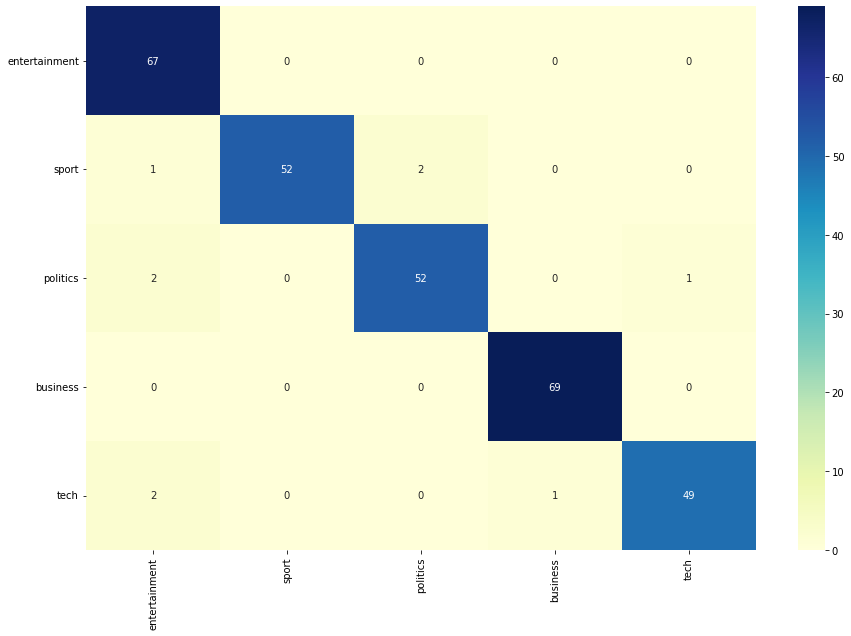

In [20]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=categories, columns=categories)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Los resultados de la matriz de confusión son una representación gráfica del análisis previo. Podemos ver que los valores de precisión (columnas) y exhaustividad (filas) son muy altos con valores muy concentrados en la diagonal principal, lo que indica una muy buena clasificación. Como se puede apreciar en la matriz de confusión, hay pequeños errores en la clasificación de algunas noticias, pero no es nada representativo si tenemos en cuenta los números.

# TO-DO: LOS NOMBRES DE LA MATRIZ APARECEN EN UN ORDEN QUE NO SON, PERO NO SE COMO CAMBIARLO

A continuación, entrena un clasificador k-NN con la configuración por defecto y usando la misma vectorización. Analiza los resultados, ¿a qué crees que se deben?

Ahora vamos a entrenar un clasificador k-NN para comparar los resultados con el anterior.

In [21]:
from sklearn import neighbors

knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(train_preprocessed, y_train)

knn_train_predictions = knn_classifier.predict(train_preprocessed)
knn_test_predictions = knn_classifier.predict(test_preprocessed)

print("k-NN, porcentaje de aciertos en entrenamiento:", np.mean(knn_train_predictions == y_train))
print("k-NN, porcentaje de aciertos en test:", np.mean(knn_test_predictions == y_test))

k-NN, porcentaje de aciertos en entrenamiento: 0.9580536912751678
k-NN, porcentaje de aciertos en test: 0.9328859060402684


A pesar de que los resultados de este análisis también son muy buenos, vemos que son peores que los del Multinomial Naive Bayes. Esto se debe a que el k-NN no es el clasificador más adecuado para este tipo de problemas en el que hay tantísimas variables. En el caso de clasificación de textos, cada palabra diferente que aparece en el corpus es una variable nueva que tiene que considerar el clasificador, y teniendo en cuenta que el k-NN va a buscar proximidad entre vecinos, va a sufrir la maldición de la dimensionalidad. Además, la matriz que considera las variables va a ser muy dispersa, con muchos valores a cero. Esto tampoco ayuda al k-NN.

Como conclusión, para clasificación de textos es mejor idea usar el clasificador anterior (Multinomial Naive Bayes).

## 3) Representación basada en word-embeddings

La segunda vectorización que vamos a usar representará los mensajes usando word-embeddings. Cada documento se representará como el vector que resulta de promediar los embeddings de cada una de sus palabras. Al igual que en el apartado anterior, usaremos monogramas y las _stop words_ que vienen configuradas por defecto para el inglés. Recuerda usar como vocabulario para vectorizar el vocabulario del fichero con las word-embeddings. 

Entrena un clasificador Naive Bayes Gaussiano (el Multinomial no admite valores negativos que sí aparecen en los embeddings). Analiza el error por clase y dibuja la matriz de confusión.

Entrena otro clasificador kNN con la nueva vectorización y la configuración por defecto y analiza su error.

#### Solución:

vamos a tener que hacer un match entre cada palabra entre la bolsa de palabras de las noticias con cada word embedding

In [22]:
from gensim.models import Word2Vec

# Cargamos el archivo de words en una lista
with open('words.txt') as f:
    lines = f.read().splitlines()

len(lines)

466551

In [23]:
#model = Word2Vec(sentences=lines)
#word_vectors = model.wv

In [24]:
we_vectorizer = CountVectorizer(vocabulary = lines,
                                stop_words = 'english',
                                binary = False, # frecuencia de aparición (NO simplemente si aparece o no)
                                lowercase = False, # para considerar palabras del texto en mayusucla
                                ngram_range=(1,1)) # solo monogramas

In [25]:
train_news_list = X_train.tolist()
print(len(train_news_list))
print(train_news_list[0:2])

1192
['india calls for fair trade rules india  which attends the g7 meeting of seven leading industrialised nations on friday  is unlikely to be cowed by its newcomer status.  in london on thursday ahead of the meeting  india s finance minister  lashed out at the restrictive trade policies of the g7 nations. he objected to subsidies on agriculture that make it hard for developing nations like india to compete. he also called for reform of the united nations  the world bank and the imf.  palaniappan chidambaram  india s finance minister  argued that these organisations need to take into account the changing world order  given india and china s integration into the global economy. he said the issue is not globalisation but  the terms of engagement in globalisation.  mr chidambaram is attending the g7 meeting as part of the g20 group of nations  which account for two thirds of the world s population. at a conference on developing enterprise hosted by uk finance minister gordon brown on fr

In [26]:
train_we = we_vectorizer.fit_transform(train_news_list)

In [27]:
# Mostramos las primeras palabras del diccionario para ver que son las mismas
tokens = we_vectorizer.get_feature_names_out()
print(tokens[0:10])

['2' '1080' '&c' '10-point' '10th' '11-point' '12-point' '16-point'
 '18-point' '1st']


In [28]:
train_we.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
# Imprime los valores que no son 0:
print(train_we)

  (0, 218)	1
  (0, 1328)	1
  (0, 2073)	2
  (0, 7550)	1
  (0, 7731)	1
  (0, 23702)	1
  (0, 27988)	1
  (0, 27993)	1
  (0, 44067)	1
  (0, 56907)	1
  (0, 57031)	1
  (0, 65684)	1
  (0, 66637)	1
  (0, 80387)	1
  (0, 81776)	2
  (0, 88143)	1
  (0, 88150)	2
  (0, 88588)	1
  (0, 98598)	1
  (0, 103349)	2
  (0, 117937)	2
  (0, 123954)	1
  (0, 131347)	4
  (0, 132370)	1
  (0, 132722)	1
  :	:
  (1191, 377156)	3
  (1191, 377591)	1
  (1191, 379416)	2
  (1191, 382368)	1
  (1191, 382492)	1
  (1191, 383548)	1
  (1191, 386491)	1
  (1191, 391190)	1
  (1191, 394382)	1
  (1191, 395206)	1
  (1191, 395207)	1
  (1191, 397033)	1
  (1191, 398966)	1
  (1191, 399936)	1
  (1191, 400130)	1
  (1191, 408243)	1
  (1191, 413281)	1
  (1191, 416276)	1
  (1191, 417990)	1
  (1191, 434425)	1
  (1191, 442649)	1
  (1191, 442655)	1
  (1191, 452830)	1
  (1191, 453620)	3
  (1191, 453624)	1


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

# Calculamos el valor TF-IDF 
tfidfer = TfidfTransformer()

train_preprocessed_we = tfidfer.fit_transform(train_we)

print(train_preprocessed_we[10])

  (0, 455162)	0.09624743775514236
  (0, 451599)	0.06649417313117706
  (0, 445294)	0.07234819226010078
  (0, 428061)	0.0922837687301001
  (0, 417990)	0.06239865669466381
  (0, 413140)	0.05452061368591741
  (0, 407283)	0.06818338171596675
  (0, 399860)	0.059562437516887064
  (0, 399836)	0.07604431988160179
  (0, 399824)	0.2121870289606381
  (0, 394392)	0.06163301809969905
  (0, 391190)	0.055203957829177926
  (0, 387244)	0.06498963081670686
  (0, 383541)	0.07234819226010078
  (0, 381292)	0.07318347522925063
  (0, 377599)	0.10379585930985097
  (0, 377591)	0.05748440738030796
  (0, 377113)	0.05474465031900073
  (0, 375960)	0.078345982599904
  (0, 371544)	0.06055886792956692
  (0, 371229)	0.07010901467999167
  (0, 370121)	0.10183391548052483
  (0, 365647)	0.06759699750386816
  (0, 362944)	0.09624743775514236
  (0, 360399)	0.04497046693549268
  :	:
  (0, 73489)	0.10609351448031905
  (0, 69148)	0.05386956583149336
  (0, 65099)	0.04766142103386885
  (0, 64528)	0.06239865669466381
  (0, 64525)	0

In [31]:
# Hacemos lo mismo pero para el conjunto de test:
test_news_list = X_test.tolist()
# IMPORTANTE: Para el conjunto de test no hace falta el "fit", ya que vamos a usar solo las palabras
# encontradas en el conjunto de entrenamiento, por lo que haremos solo "transform"
test_we = we_vectorizer.transform(test_news_list)
# Calculamos también su valor TF-IDF (el IDF es el del conjunto de entrenamiento)
test_preprocessed_we = tfidfer.transform(test_we)

In [32]:
from sklearn.naive_bayes import GaussianNB

gnb_classifier = GaussianNB()

gnb_classifier.fit(train_preprocessed_we.toarray(), y_train)

gnb_train_predictions = gnb_classifier.predict(train_preprocessed_we.toarray())
gnb_test_predictions = gnb_classifier.predict(test_preprocessed_we.toarray())

print("Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento:", np.mean(gnb_train_predictions == y_train))
print("Gaussian Naive Bayes, porcentaje de aciertos en test:", np.mean(gnb_test_predictions == y_test))

Gaussian Naive Bayes, porcentaje de aciertos en entrenamiento: 1.0
Gaussian Naive Bayes, porcentaje de aciertos en test: 0.8926174496644296


# TO-DO: Comentar esto. El entrenamiento ha mejorado al 100%, pero el test ha empeorado bastante. Encontrar un motivo.

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

classifier = gnb_classifier
predictions = gnb_test_predictions

print(classification_report(y_test, predictions))

               precision    recall  f1-score   support

     business       0.86      0.85      0.86        67
entertainment       0.94      0.87      0.91        55
     politics       0.83      0.89      0.86        55
        sport       1.00      0.93      0.96        69
         tech       0.83      0.92      0.87        52

     accuracy                           0.89       298
    macro avg       0.89      0.89      0.89       298
 weighted avg       0.90      0.89      0.89       298



In [34]:
# Para poder poner los nombres de las categorías en la matriz de confusión, necesitamos una lista
# con valores únicos de las categorías. Para ello, pasamos de nuestro array a un set y del set a una lista

my_set = set(y_test)
categories = list(my_set)
print(categories)

['entertainment', 'sport', 'politics', 'business', 'tech']


In [35]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{'business': 67, 'entertainment': 55, 'politics': 55, 'sport': 69, 'tech': 52}

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'entertainment'),
  Text(1.5, 0, 'sport'),
  Text(2.5, 0, 'politics'),
  Text(3.5, 0, 'business'),
  Text(4.5, 0, 'tech')])

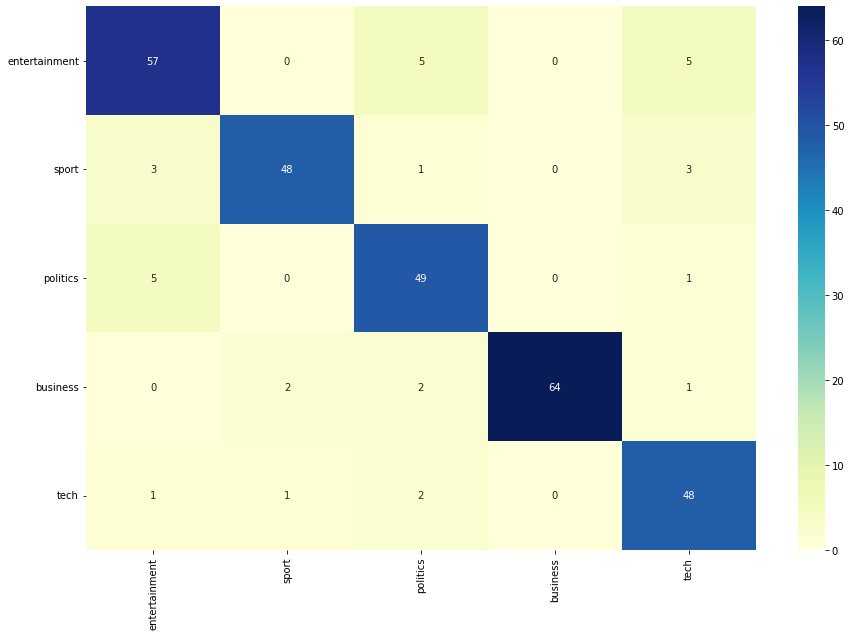

In [36]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)
conf_matrix_df = pd.DataFrame(conf_matrix, index=categories, columns=categories)

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=conf_matrix.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

Ahora vamos a entrenar un clasificador k-NN para comparar los resultados con el anterior.

In [37]:
from sklearn import neighbors

knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(train_preprocessed_we, y_train)

knn_train_predictions = knn_classifier.predict(train_preprocessed_we)
knn_test_predictions = knn_classifier.predict(test_preprocessed_we)

print("k-NN, porcentaje de aciertos en entrenamiento:", np.mean(knn_train_predictions == y_train))
print("k-NN, porcentaje de aciertos en test:", np.mean(knn_test_predictions == y_test))

k-NN, porcentaje de aciertos en entrenamiento: 0.9463087248322147
k-NN, porcentaje de aciertos en test: 0.9362416107382551


# TO-DO: Resultados muy similares al k-nn de bolsa de palabras (ejercicio 2). ¿Por qué k-nn tiene un resultado similar pero en naive bayes hay tanta diferencia entre bolsa de palabras y word embedding?

# TO-DO: REVISAR TODA ESTA ULTIMA PARTE DE WORD EMBEDDINGS Y HACER LOS ANÁLISIS UNA VEZ ESTEMOS SEGUROS DE QUE ESTÁ BIEN

## 4) Análisis comparativo final

Hemos entrenado dos clasificadores usando dos vectorizaciones diferentes de los datos. Compara la tasa de acierto de todos ellos y explica a qué crees que se deben las diferencias.

Busca un mensaje mal clasificado por el Naive Bayes con vectorización de frecuencias y otro mal clasificado por el k-NN con Word-embeddings. Analiza los vectores de términos de dichos mensajes e intenta razonar por qué ha sido clasificado erróneamente.

Para el Naive Bayes con vectorización de frecuencias, elige dos clases donde el clasificador no haya funcionado bien y analiza las palabras más relevantes para clasificar una noticia como de dichas clases. Razona si lo que ves crees que influye en la posible confusión a la hora de clasificar entre dichas clases.

#### Solución:

Para poder analizar más fácilmente los resultados, vamos a dibujar dos tablas, una para vectorización de frecuencias y otra para word-embeddings. De esta forma podremos visualizar las relaciones entre los resultados de las distintas vectorizaciones y sacar mejores conclusiones. Los porcentajes mostrados en las tablas son los porcentajes de aciertos de entrenamiento y test para cada clasificador y cada tipo de vectorización.

| **VECTORIZACIÓN FRECUENCIAS** | **Entrenamiento** | **Test** |
|-------------------------------|-------------------|----------|
| **Naive Bayes (Multinomial)** | 99.33%            | 96.98%   |
| **k-NN**                      | 95.81%            | 93.29%   |

| **WORD-EMBEDDINGS**        | **Entrenamiento** | **Test** |
|----------------------------|-------------------|----------|
| **Naive Bayes (Gaussian)** | 100%              | 89.26%   |
| **k-NN**                   | 94.63%            | 93.62%   |

Como vemos, todos los porcentajes se mantienen muy similares. El que más llama la atención es el clasificador Naive Bayes en la fase de test, que de vectorización de frecuencias a word-embedding vemos una disminución de casi un 8% que, comparado con las demás variaciones, es un cambio es muy llamativo.

Esto se debe a...
## continuar esto y cambiar tablas con valores de ultima ejecucion

Vamos a buscar un mensaje mal clasificado por el Naive Bayes con vectorización de frecuencias para analizar los vectores de términos de ese mensaje.

In [38]:
errorFound = False
i = 0

while not errorFound and i < len(mnb_train_predictions):
    if mnb_train_predictions[i] != y_train[i]:
        errorFound = True
    else:
        i += 1 # solo incrementamos la i si son iguales, porque si no queremos guardar la i que falla

# una vez hemos encontrado un mensaje mal categorizado, analizamos su vector (posicion i)
print("Naive Bayes: falla en la posicion", i)
print("Prediccion:", mnb_train_predictions[i])
print("Categoria real:", y_train[i])

Naive Bayes: falla en la posicion 229
Prediccion: business
Categoria real: politics


# TO-DO: Aquí hay que meter el texto 229 vectorizado, pero no sé cómo hacelo para que sea legible para nosotros

Como vemos, el primer mensaje cuya clasificación falla es el texto número 229. La predicción era que su categoría iba a ser de _business_, pero realmente era de _politics_. Para poder ver fallos potenciales a la hora de predecir según palabras encontradas, vamos a ver cuáles son los términos más relevantes para cada una de estas dos categorías:

In [44]:
def print_top20_features_per_class_in_NB(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names_out()
    print("Top 20 features per class\n")
    for i, class_label in enumerate(class_labels):
        top20 = np.argsort(clf.feature_log_prob_[i])[-20:]
        reversed_top = top20[::-1]
        
        print("%s: %s" % (class_label,
              " / ".join(feature_names[j] for j in reversed_top)),'\n')
        
        #Descomentar para ver el índice de los términos en el diccionario
        #print("%s " % (" / ".join(str(j) for j in reversed_top)),'\n')

In [47]:
print_top20_features_per_class_in_NB(vectorizer, mnb_classifier, y_test)     

Top 20 features per class

business: said / growth / economy / market / bank / firm / year / mr / sales / economic / company / shares / oil / 2004 / dollar / china / prices / rates / business / profits 

entertainment: film / best / music / band / said / awards / album / actor / year / star / award / number / films / chart / oscar / tv / festival / director / won / comedy 

business: mr / labour / said / election / blair / party / government / brown / minister / howard / prime / tax / people / tory / tories / lib / public / plans / chancellor / secretary 

sport: england / game / said / win / cup / match / chelsea / team / season / world / players / injury / arsenal / ireland / coach / club / time / wales / final / year 

business: people / mobile / said / software / users / technology / microsoft / digital / phone / broadband / net / music / phones / games / search / service / computer / video / use / virus 



IndexError: index 5 is out of bounds for axis 0 with size 5

# Esto está mal: No sé por qué están mal las clases. El primer business está bien. El segundo entertainment está bien. El tercer business debería ser politics. El cuarto sport está bien. El quinto business debería ser tech.

Ahora vamos a buscar un mensaje mal clasificado por el k-NN con word-embeddings:

In [55]:
errorFound = False
i = 0

while not errorFound and i < len(knn_train_predictions):
    if knn_train_predictions[i] != y_train[i]:
        errorFound = True
    else:
        i += 1 # solo incrementamos la i si son iguales, porque si no queremos guardar la i que falla

# una vez hemos encontrado un mensaje mal categorizado, analizamos su vector (posicion i)
print("k-NN: falla en la posicion", i)
print("Prediccion:", knn_train_predictions[i])
print("Categoria real:", y_train[i])

k-NN: falla en la posicion 40
Prediccion: tech
Categoria real: politics


# TO-DO: Aquí hay que meter el texto 40 vectorizado, pero no sé cómo hacelo para que sea legible para nosotros

hay que entender por que una clasificacion ha podido fallar

# Para el último párrafo del ejercicio 4 también habría que entender la vectorización de palabras y ver cuáles son las más relevantes, pero no sé cómo hacerlo